Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import CNN

# from config_plots import global_settings
# global_settings()
import warnings
warnings.filterwarnings("ignore")

Hyper parameters

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11"
showListOfSpecies = False

from configParser import ConfigParser, getModelName
config_parser = ConfigParser(experimentName)
    
experimentName = experimentName + "/multi-trial"
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

Use_old_dataLoader = False
if Use_old_dataLoader:
    import dataLoader
else:
    import dataLoader2 as dataLoader

Cuda support

In [3]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Iterate

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from confusion_matrix_plotter import plot_confusion_matrix2, generate_classification_report
import numpy as np
import os
import progressbar

paramsIterator = config_parser.getHyperpIter()  
number_of_experiments = sum(1 for e in paramsIterator)
paramsIterator = config_parser.getHyperpIter()  
experiment_index = 0

with progressbar.ProgressBar(max_value=number_of_experiments) as bar:
    for experiment_params in paramsIterator:
        bar.update(experiment_index)
        experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1

        print("experiment ", experiment_index+1, "/", number_of_experiments, ": ", experiment_params)

        # load images
        dataset = dataLoader.FishDataset(experiment_params, showListOfSpecies)
        speciesList = dataset.getSpeciesList()
        numberOfSpecies = len(speciesList)

        confusionMatricesPerTrial = []

        for i in range(experiment_params["numOfTrials"]):
            trialName = experimentName+"/"+getModelName(experiment_params, i)

            # Train/Load model
            model = CNN.CNN(numberOfSpecies, experiment_params)
            if os.path.exists(CNN.getModelFile(trialName)):
                _, _, epochs, time_elapsed = CNN.loadModel(model, trialName)
                test_loader = dataLoader.loadTestLoader(trialName)
                print("Model {0} loaded!".format(trialName))
            else:
                train_loader, validation_loader, test_loader = dataLoader.getLoadersFromDataset(dataset, experiment_params, trialName)
                _, _, epochs, time_elapsed = CNN.trainModel(train_loader, validation_loader, experiment_params, model, trialName)

            # Update trial outcomes for statistics
            predlist, lbllist = CNN.getLoaderPredictions(test_loader, model)
            ts.addTrialPredictions(experiment_params, predlist, lbllist, numberOfSpecies)

            ts.addTrial(experiment_params,
                    {'loss': CNN.getCrossEntropyFromLoader(test_loader, model),
                     'accuracy': CNN.getAccuracyFromLoader(test_loader, model),
                     'time': time_elapsed,
                     'epochs': epochs
                    }, i)
        
        experiment_index = experiment_index + 1

N/A% (0 of 16) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  1 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d28_c1_zcaFalse_id0 loaded!


  6% (1 of 16) |#                        | Elapsed Time: 0:00:48 ETA:   0:12:08

experiment  2 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d28_c1_zcaTrue_id0 loaded!


 12% (2 of 16) |###                      | Elapsed Time: 0:01:20 ETA:   0:07:23

experiment  3 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d28_c1_zcaFalse_id0 loaded!


 18% (3 of 16) |####                     | Elapsed Time: 0:01:37 ETA:   0:03:44

experiment  4 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d28_c1_zcaTrue_id0 loaded!


 25% (4 of 16) |######                   | Elapsed Time: 0:02:08 ETA:   0:06:15

experiment  5 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d28_c3_zcaFalse_id0 loaded!


 31% (5 of 16) |#######                  | Elapsed Time: 0:02:24 ETA:   0:02:50

experiment  6 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d28_c3_zcaTrue_id0 loaded!


 37% (6 of 16) |#########                | Elapsed Time: 0:02:54 ETA:   0:05:01

experiment  7 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d28_c3_zcaFalse_id0 loaded!


 43% (7 of 16) |##########               | Elapsed Time: 0:03:10 ETA:   0:02:24

experiment  8 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d28_c3_zcaTrue_id0 loaded!


 50% (8 of 16) |############             | Elapsed Time: 0:03:42 ETA:   0:04:14

experiment  9 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d56_c1_zcaFalse_id0 loaded!


 56% (9 of 16) |##############           | Elapsed Time: 0:04:00 ETA:   0:02:03

experiment  10 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d56_c1_zcaTrue_id0 loaded!


 62% (10 of 16) |###############         | Elapsed Time: 0:04:39 ETA:   0:03:54

experiment  11 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d56_c1_zcaFalse_id0 loaded!


 68% (11 of 16) |################        | Elapsed Time: 0:04:56 ETA:   0:01:26

experiment  12 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d56_c1_zcaTrue_id0 loaded!


 75% (12 of 16) |##################      | Elapsed Time: 0:05:36 ETA:   0:02:41

experiment  13 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d56_c3_zcaFalse_id0 loaded!


 81% (13 of 16) |###################     | Elapsed Time: 0:05:56 ETA:   0:00:58

experiment  14 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks5_k16-32_p50_d56_c3_zcaTrue_id0 loaded!


 87% (14 of 16) |#####################   | Elapsed Time: 0:09:03 ETA:   0:06:15

experiment  15 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d56_c3_zcaFalse_id0 loaded!


 93% (15 of 16) |######################  | Elapsed Time: 0:09:22 ETA:   0:00:18

experiment  16 / 16 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


Calculating ZCA
Calculating ZCA done
Model test_22987_suffix50_11/multi-trial/tc0_vc0_bs200_e1000_ks9_k16-32_p50_d56_c3_zcaTrue_id0 loaded!


100% (16 of 16) |########################| Elapsed Time: 0:12:44 Time:  0:12:44


Analyze

In [5]:
ts.saveStatistics()
ts.showStatistics()

Aggregated statistics


In [6]:
ts.saveStatistics(False)
ts.showStatistics(False)

Raw statistics


,image_path,suffix,training_count,validation_count,batchSize,n_epochs,numOfTrials,kernels,kernelSize,patience,imageDimension,n_channels,useZCAWhitening,loss,accuracy,time,epochs,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,28,1,False,1.274188,0.654545,17240.944431,2.438960,2589957650963463659,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,28,1,True,2.431529,0.618182,8497.630383,2.396463,6528281290907578006,0
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,9,50,28,1,False,1.814054,0.609091,5793.836938,2.422260,-1569856740269344770,0
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,9,50,28,1,True,2.622050,0.672727,11353.486596,2.396939,-2787279064792832141,0
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,28,3,False,1.974509,0.554545,4352.191955,2.403552,-8647493366855873272,0
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,28,3,True,2.807661,0.654545,8827.384069,2.409165,5209845328921159801,0
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,9,50,28,3,False,2.412274,0.590909,9413.744455,2.417364,8144838743696155265,0
7,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,9,50,28,3,True,2.692469,0.554545,9682.135866,2.395795,-7057111050087353360,0
8,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,56,1,False,2.752985,0.581818,6796.243133,2.417931,-1084754328275512187,0
9,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,1,16 32,5,50,56,1,True,2.410740,0.627273,11876.362878,2.435737,3475129343914167804,0


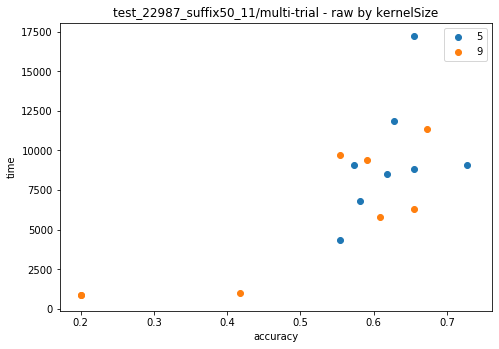

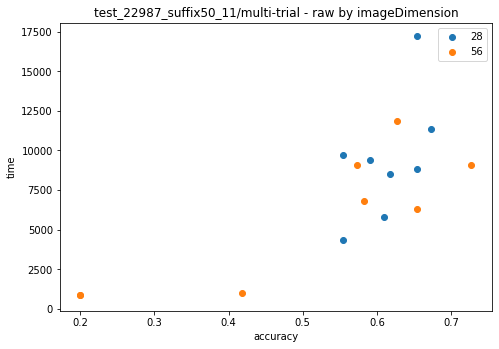

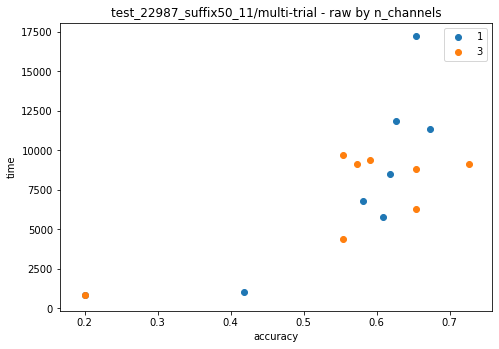

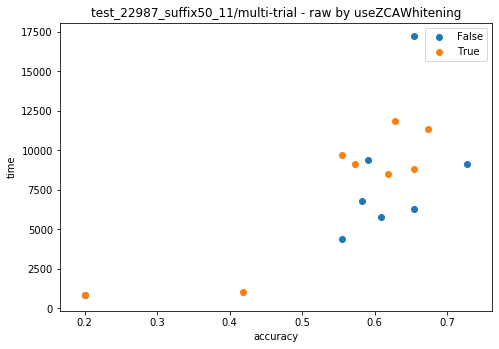

In [7]:
ts.trialScatter('accuracy', 'time', False, 'kernelSize')
ts.trialScatter('accuracy', 'time', False, 'imageDimension')
ts.trialScatter('accuracy', 'time', False, 'n_channels')
ts.trialScatter('accuracy', 'time', False, 'useZCAWhitening')

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


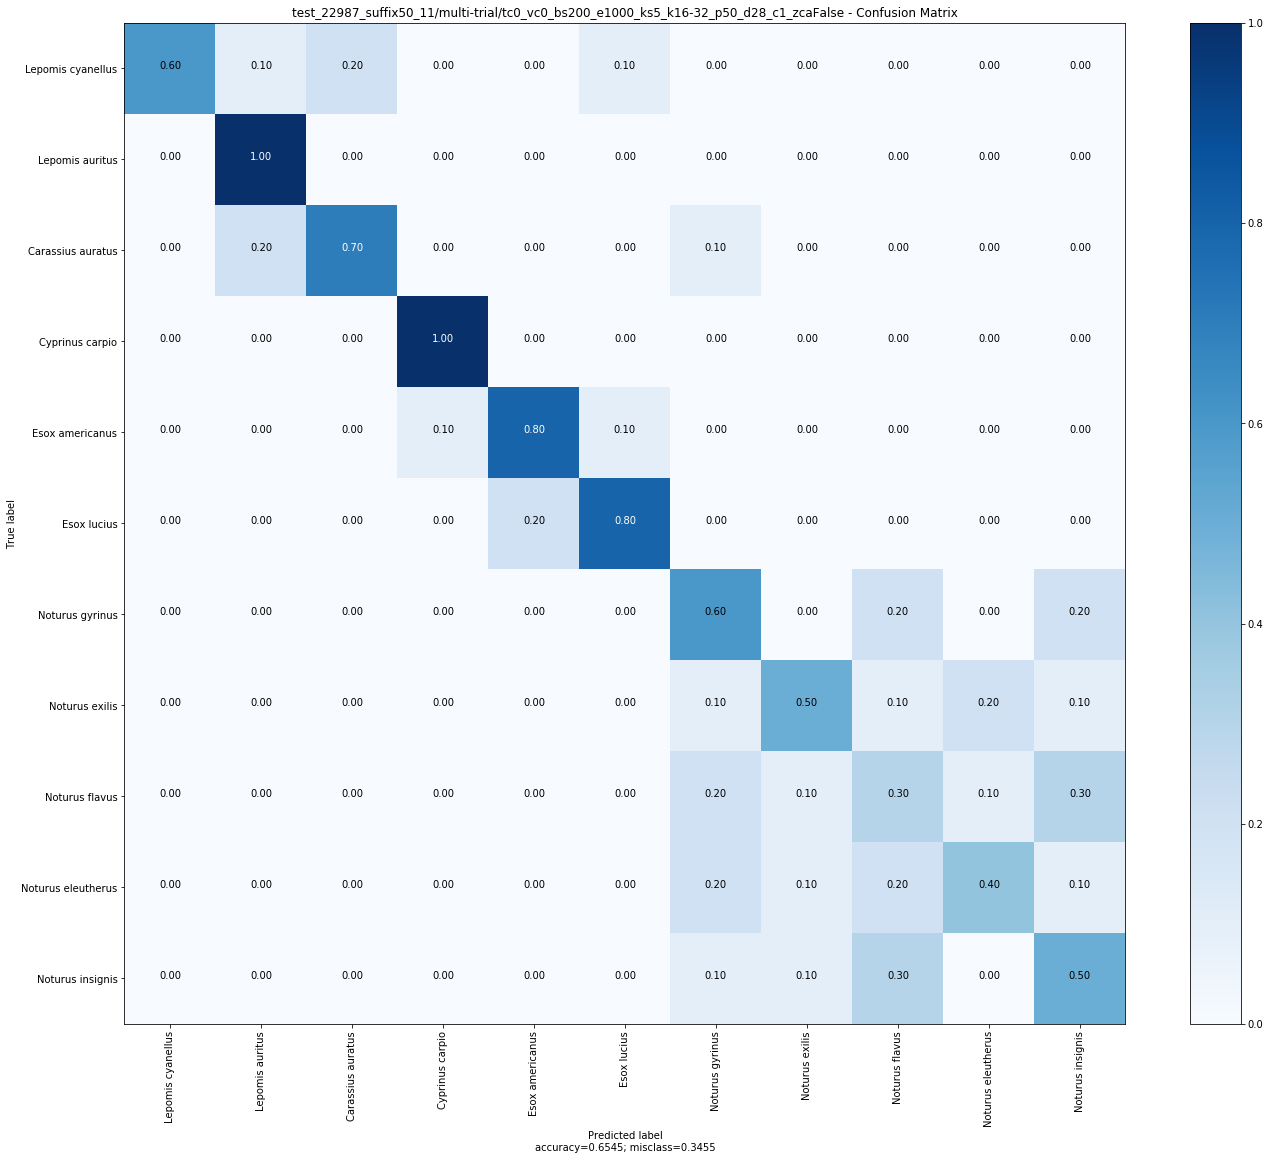

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


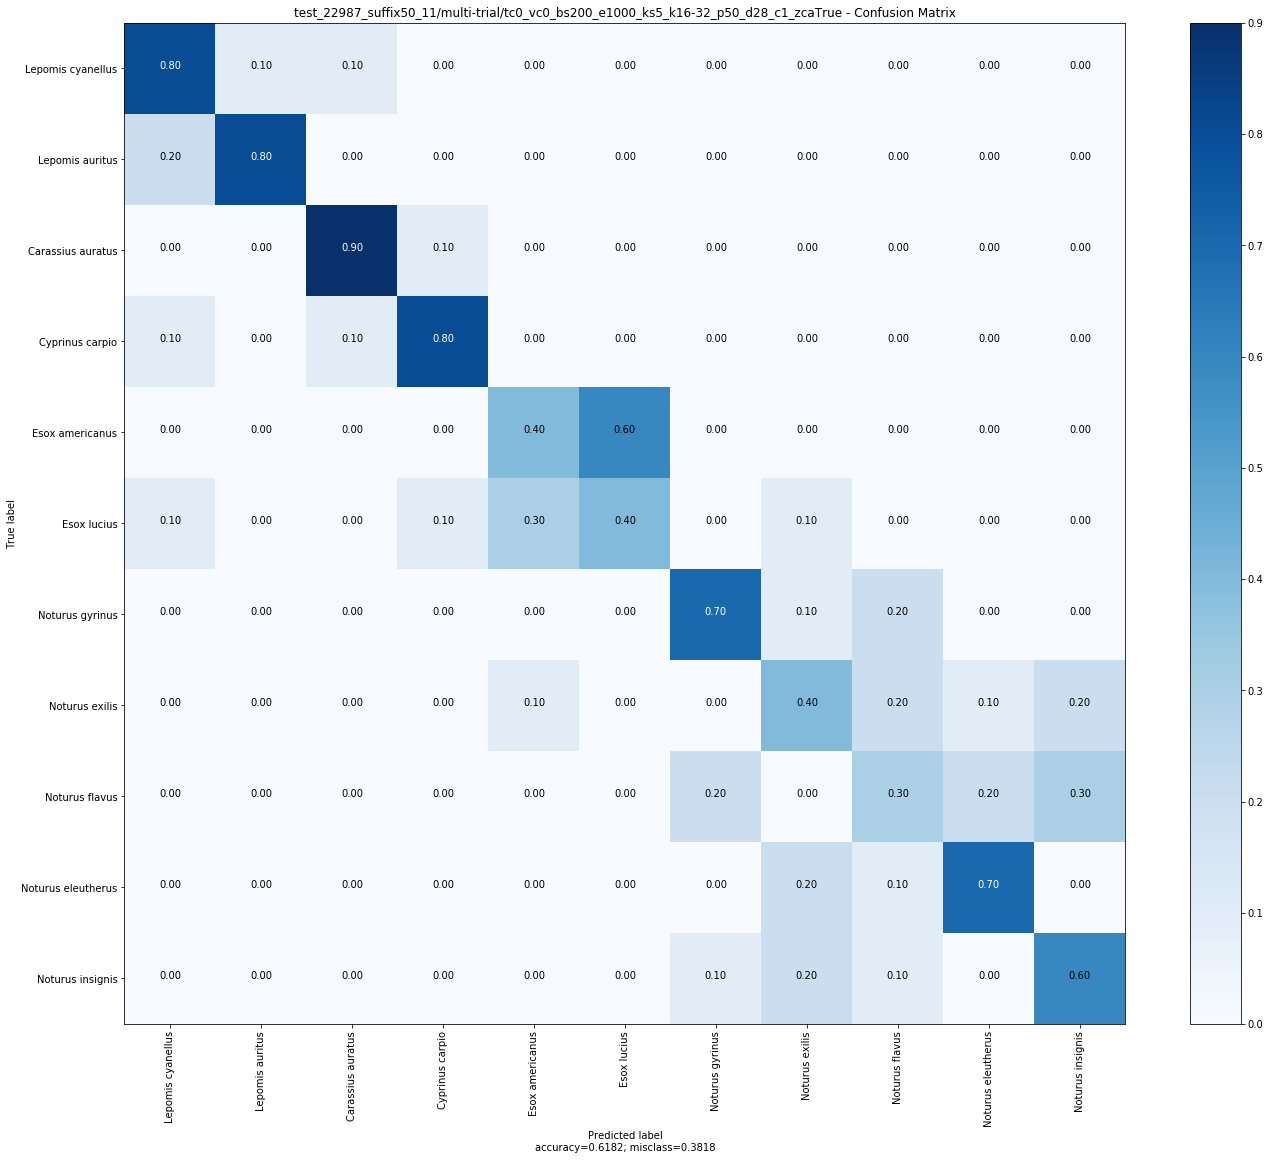

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


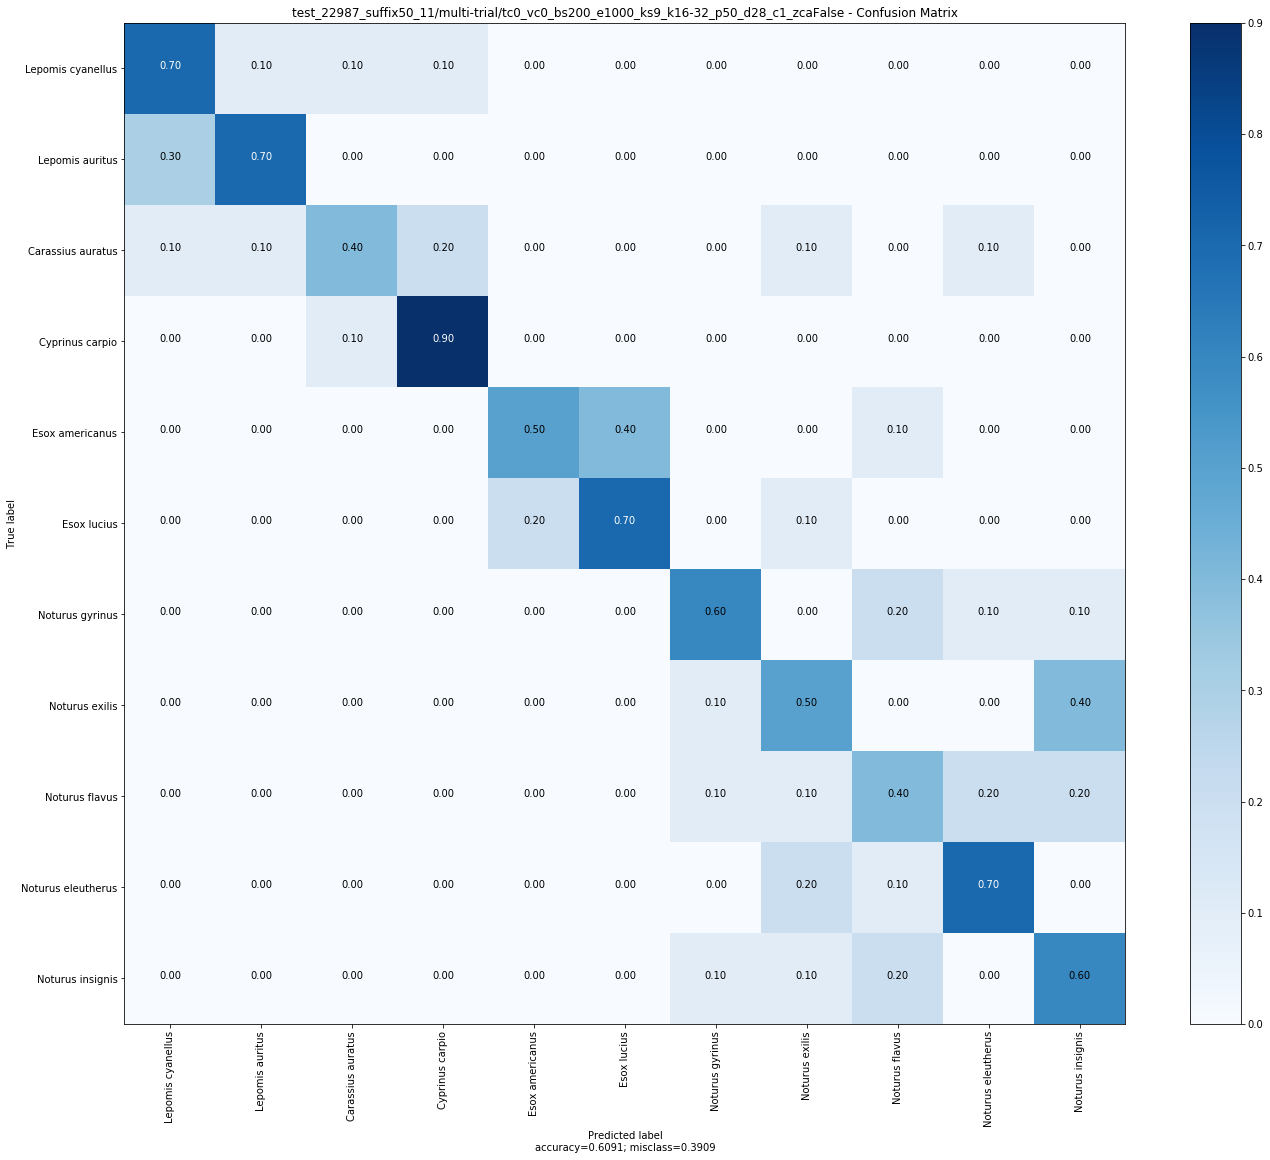

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


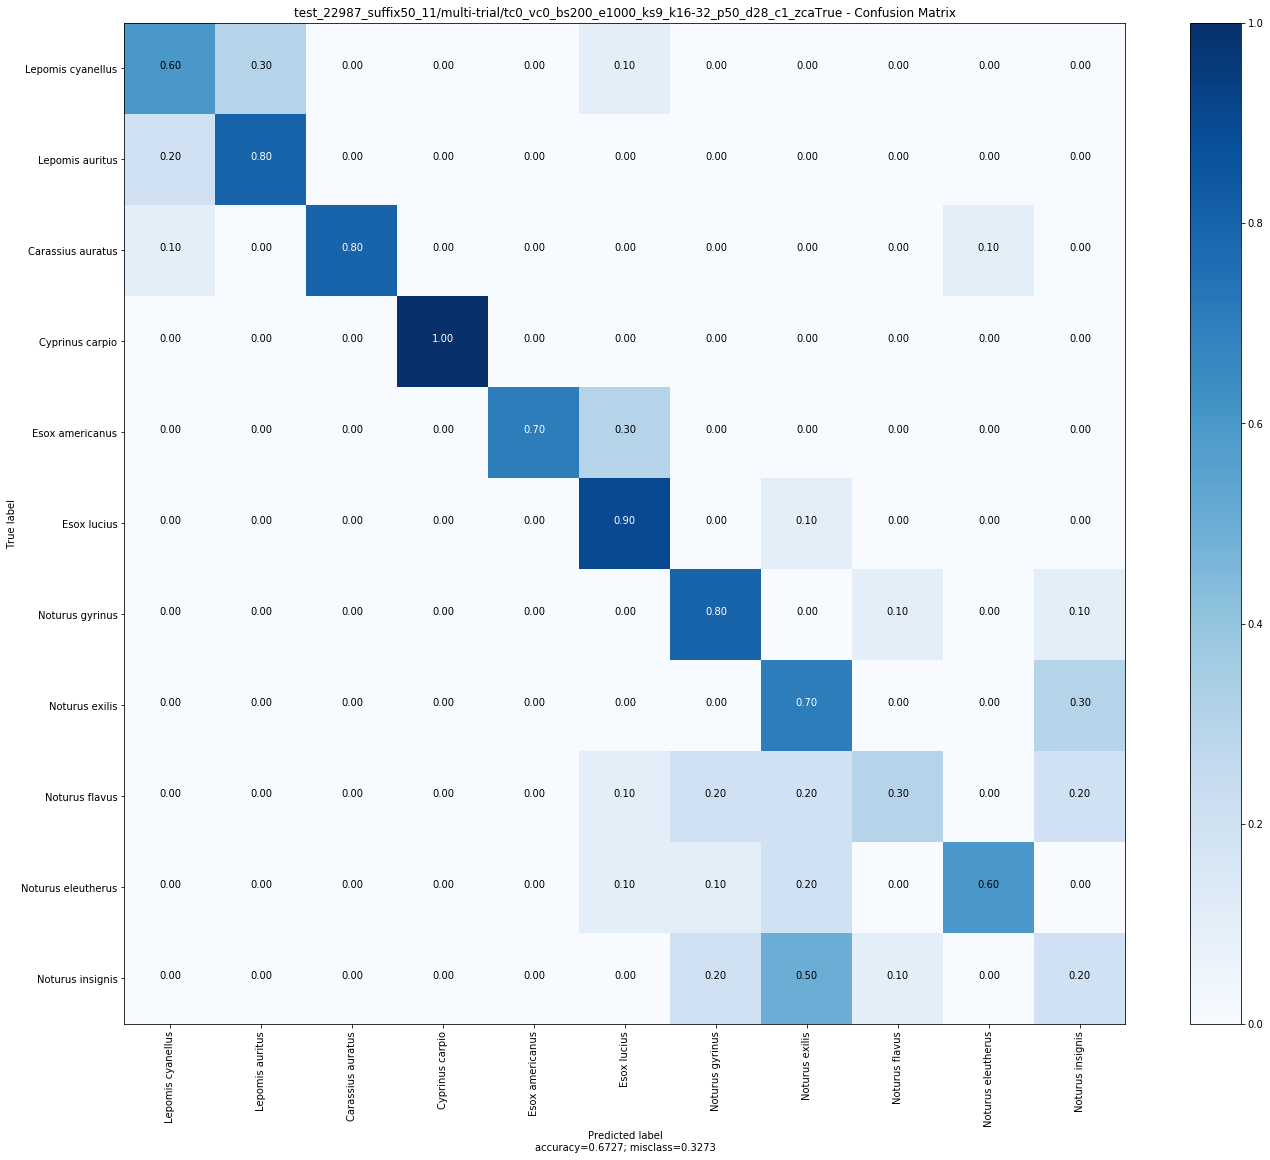

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


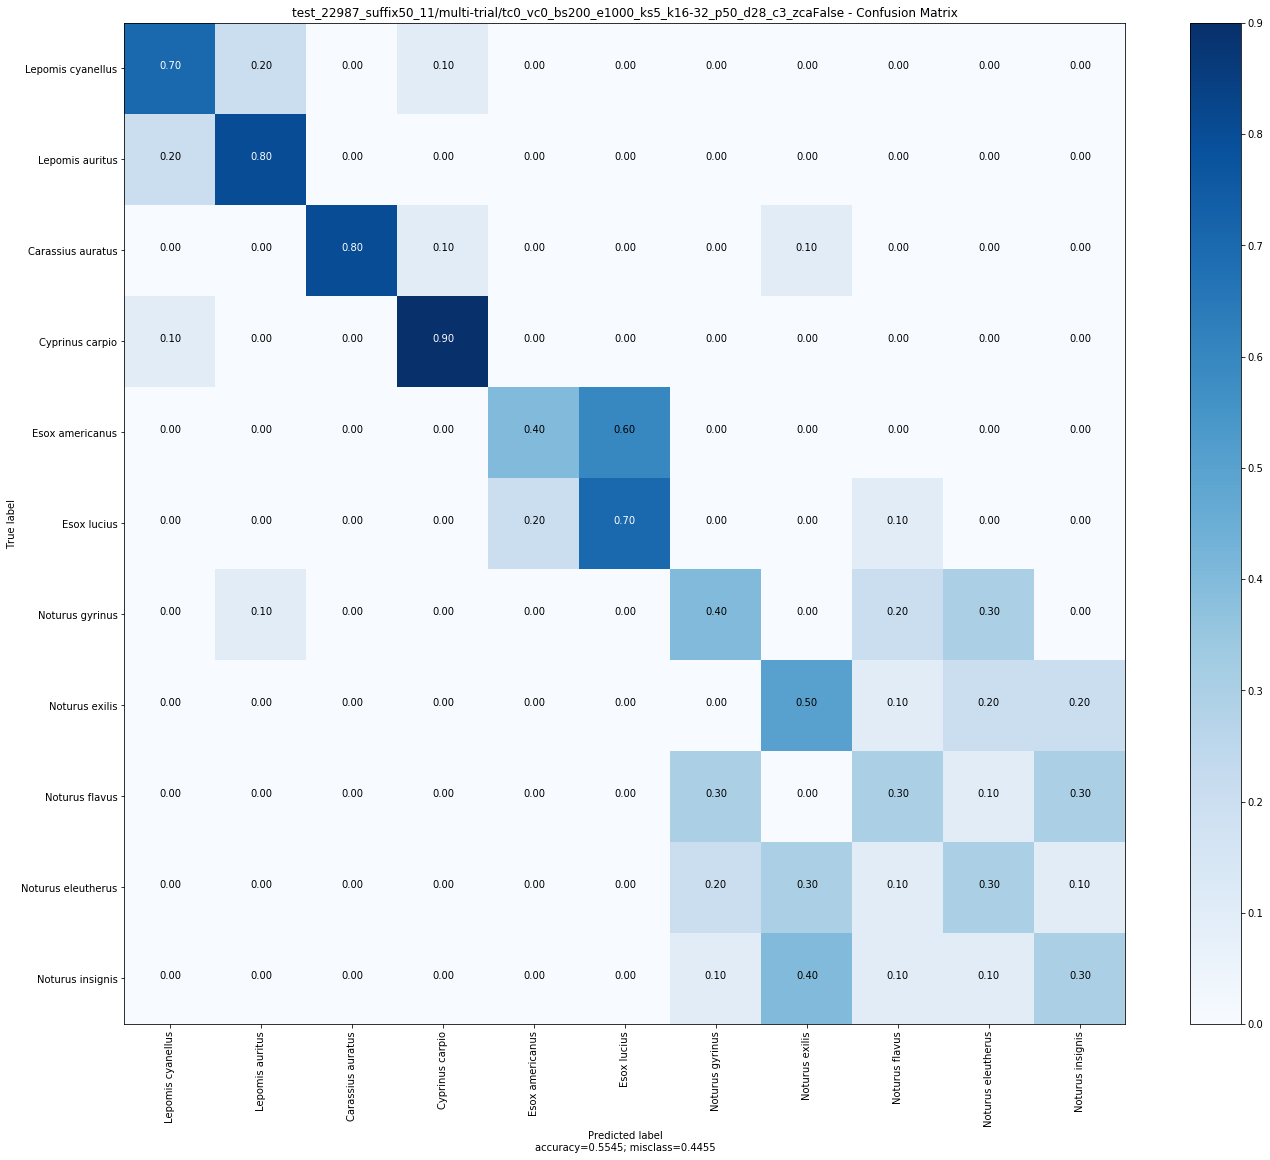

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


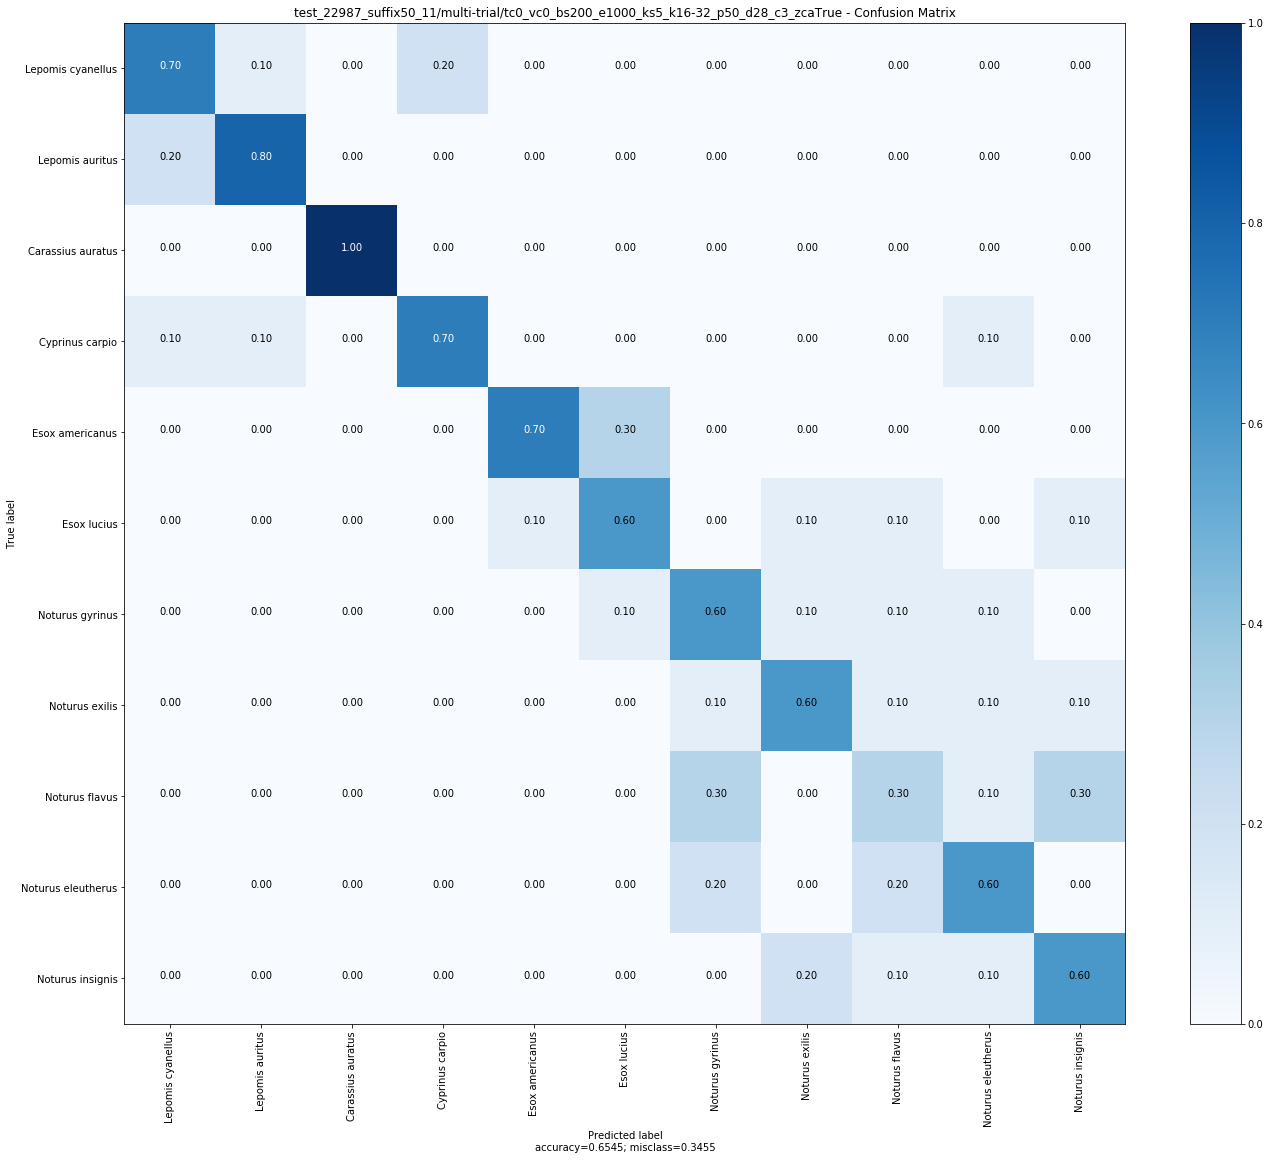

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


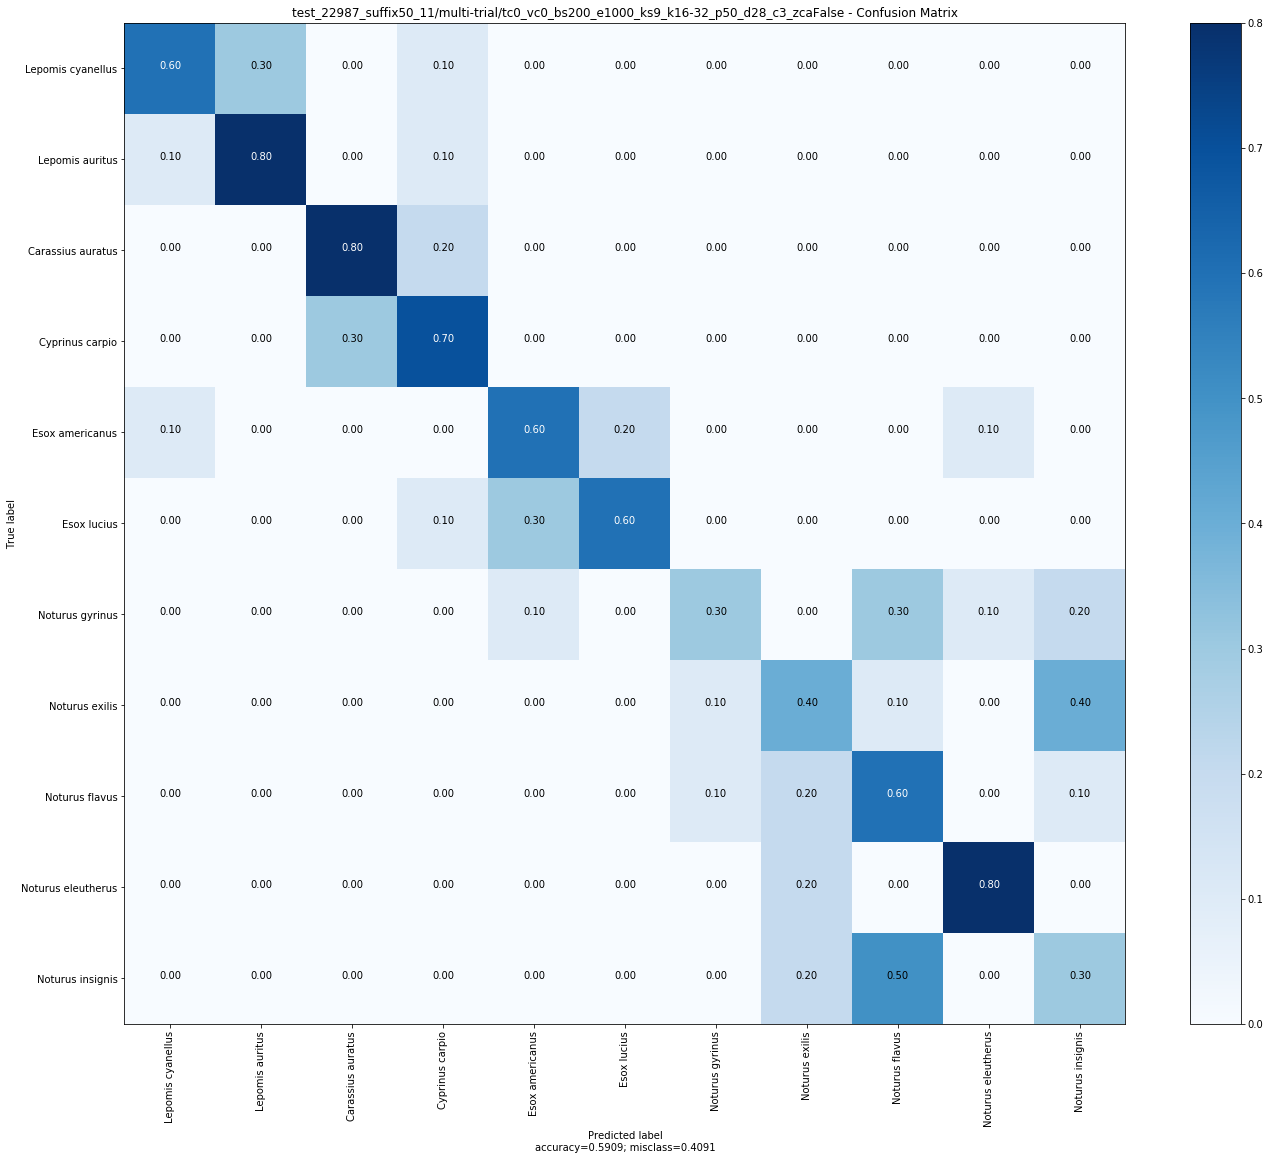

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


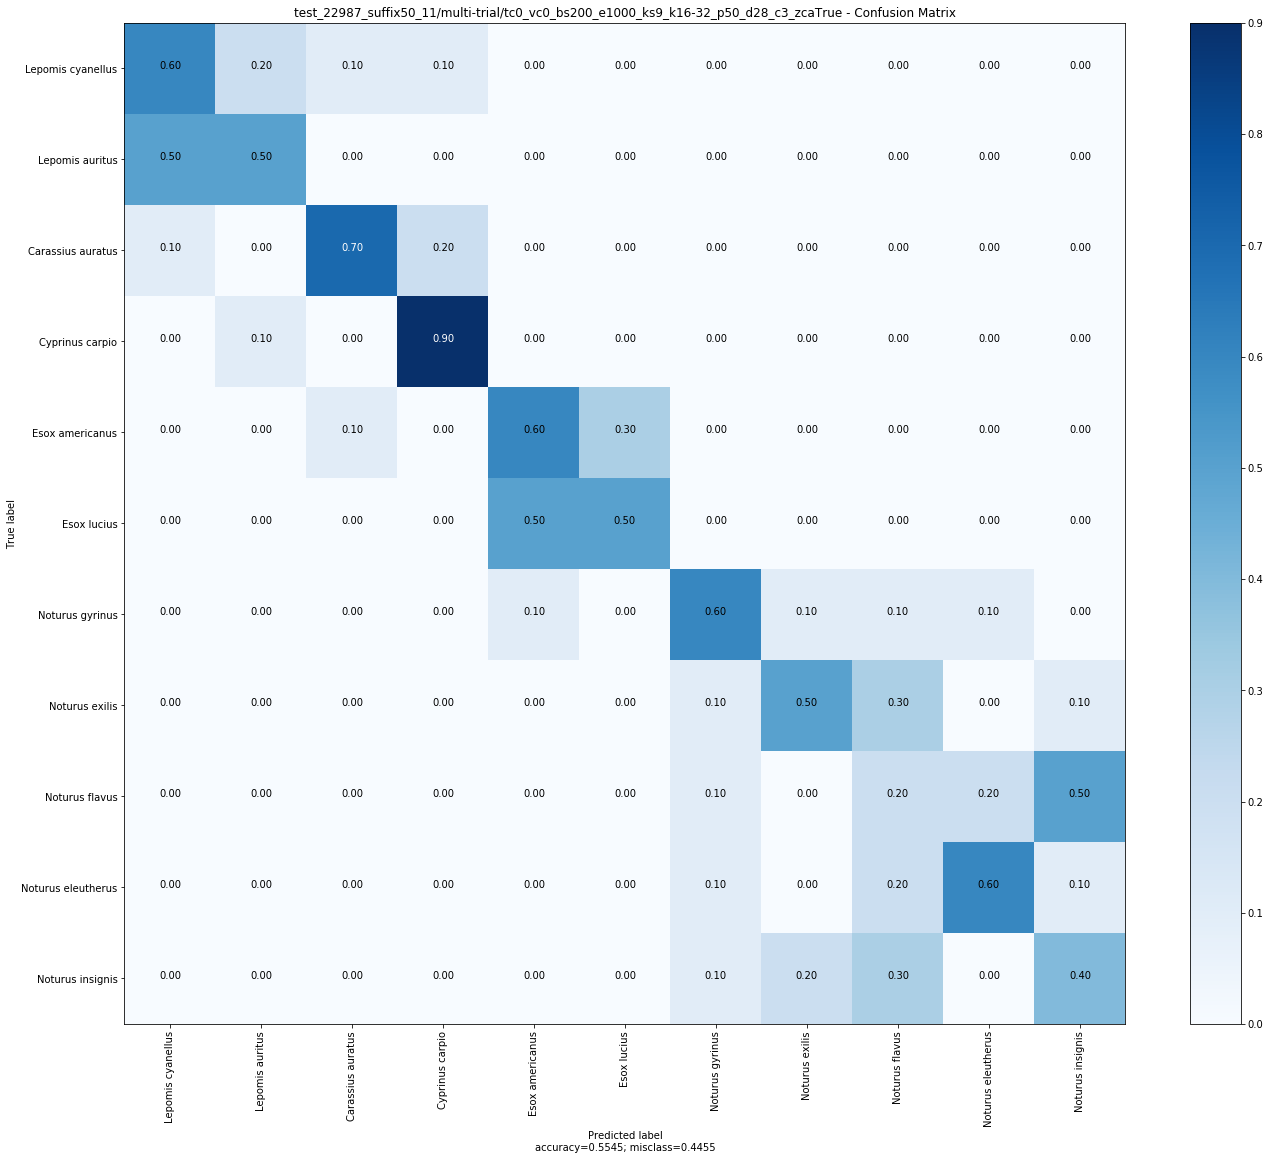

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Loading saved dataset structure...


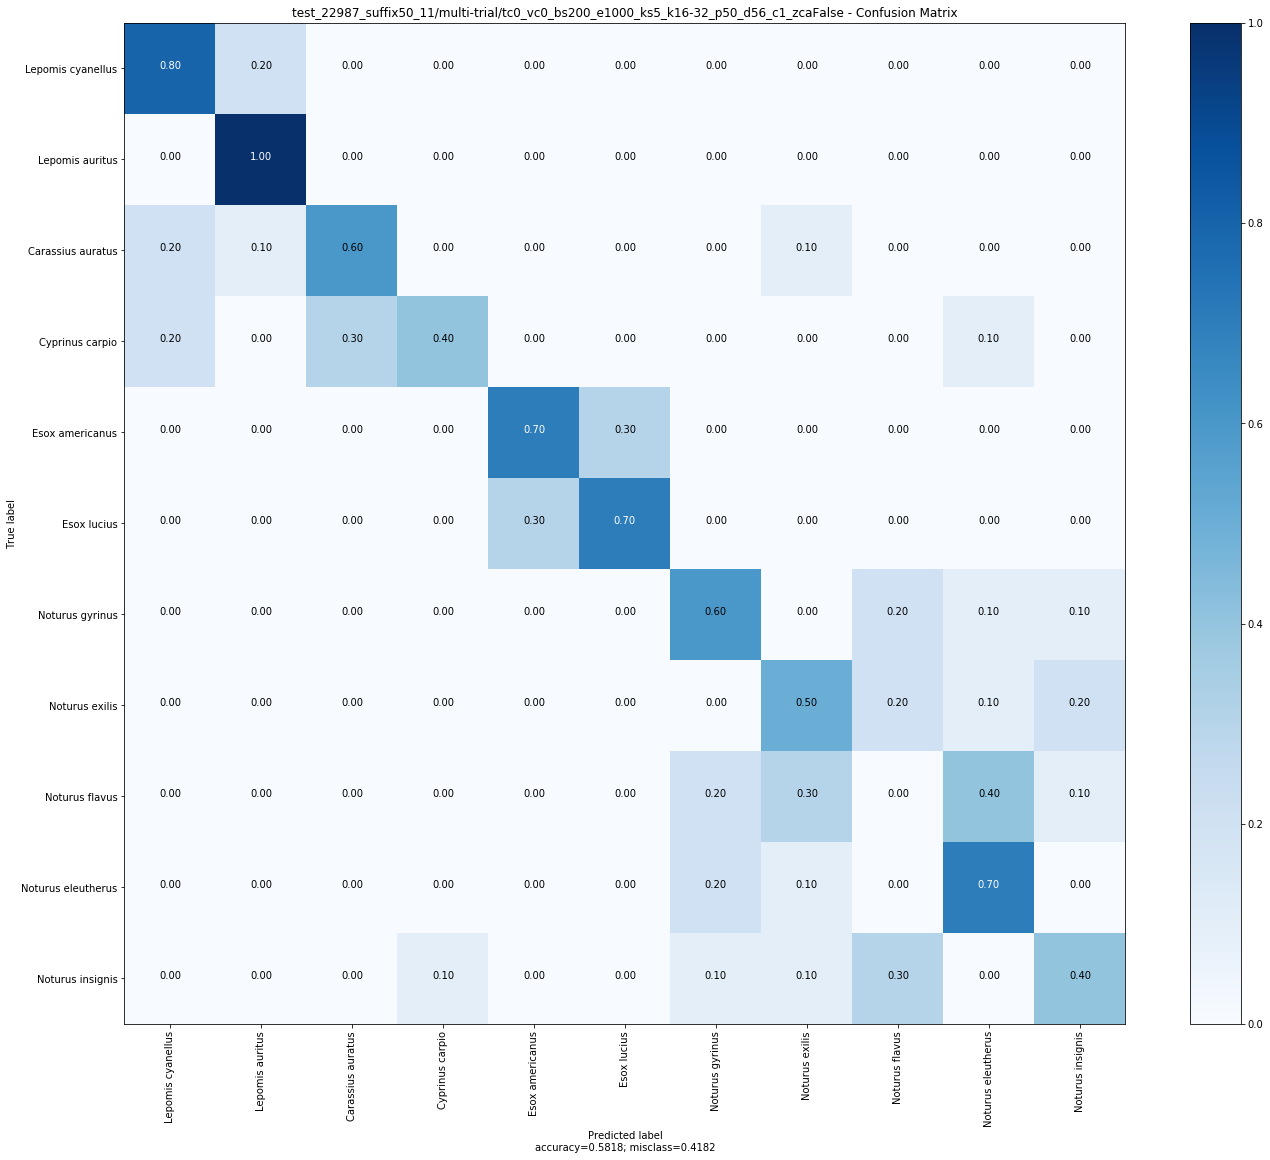

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


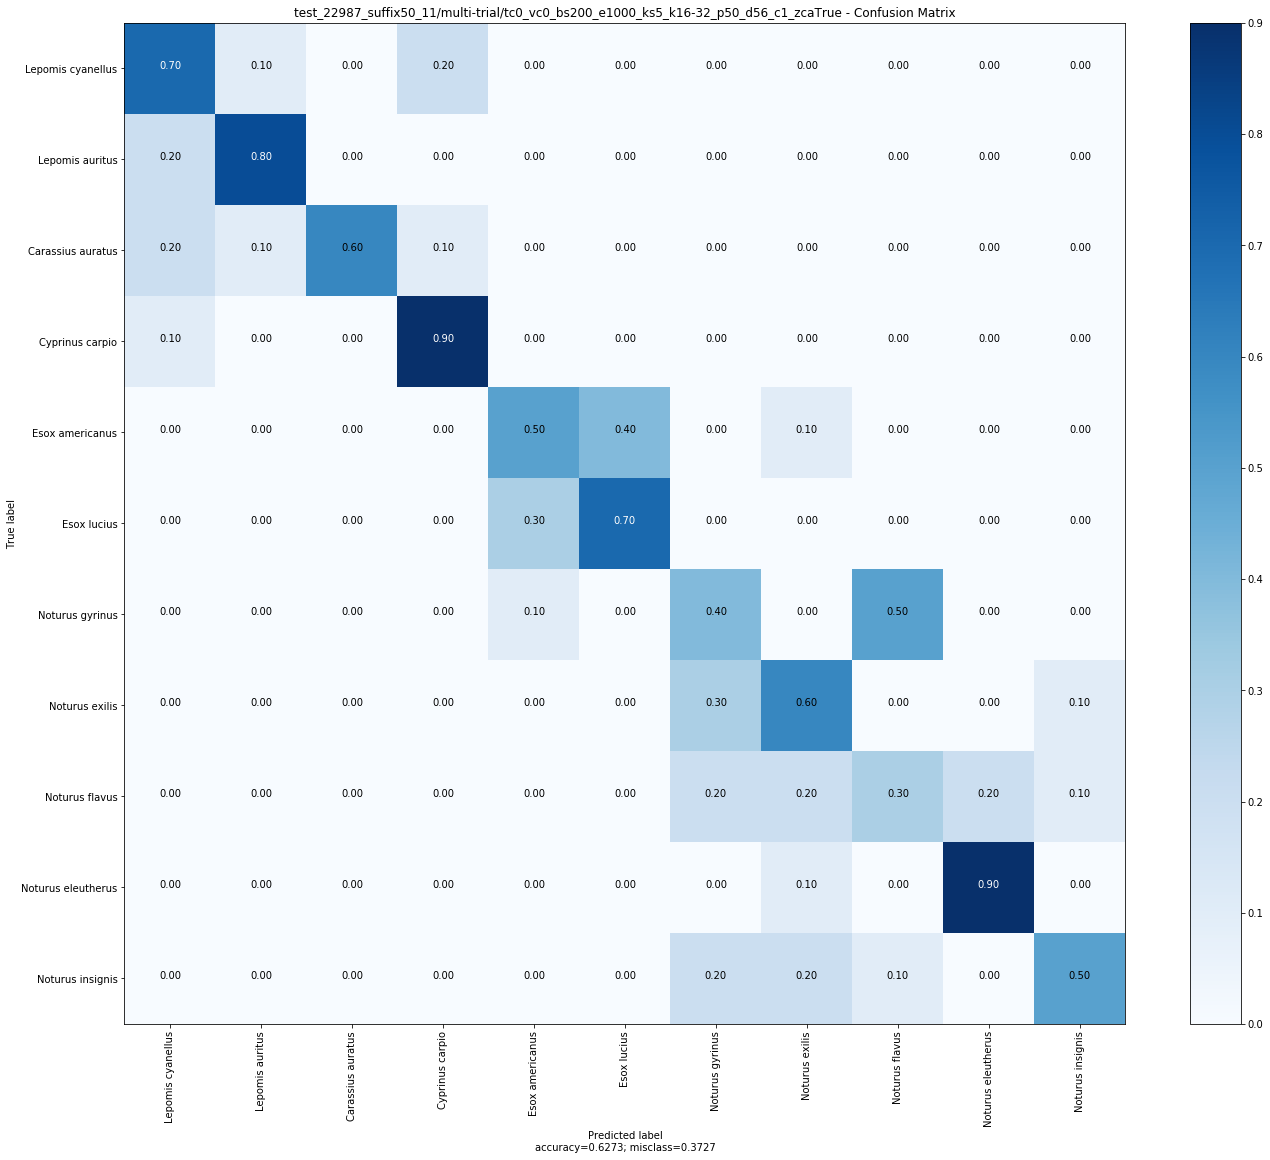

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


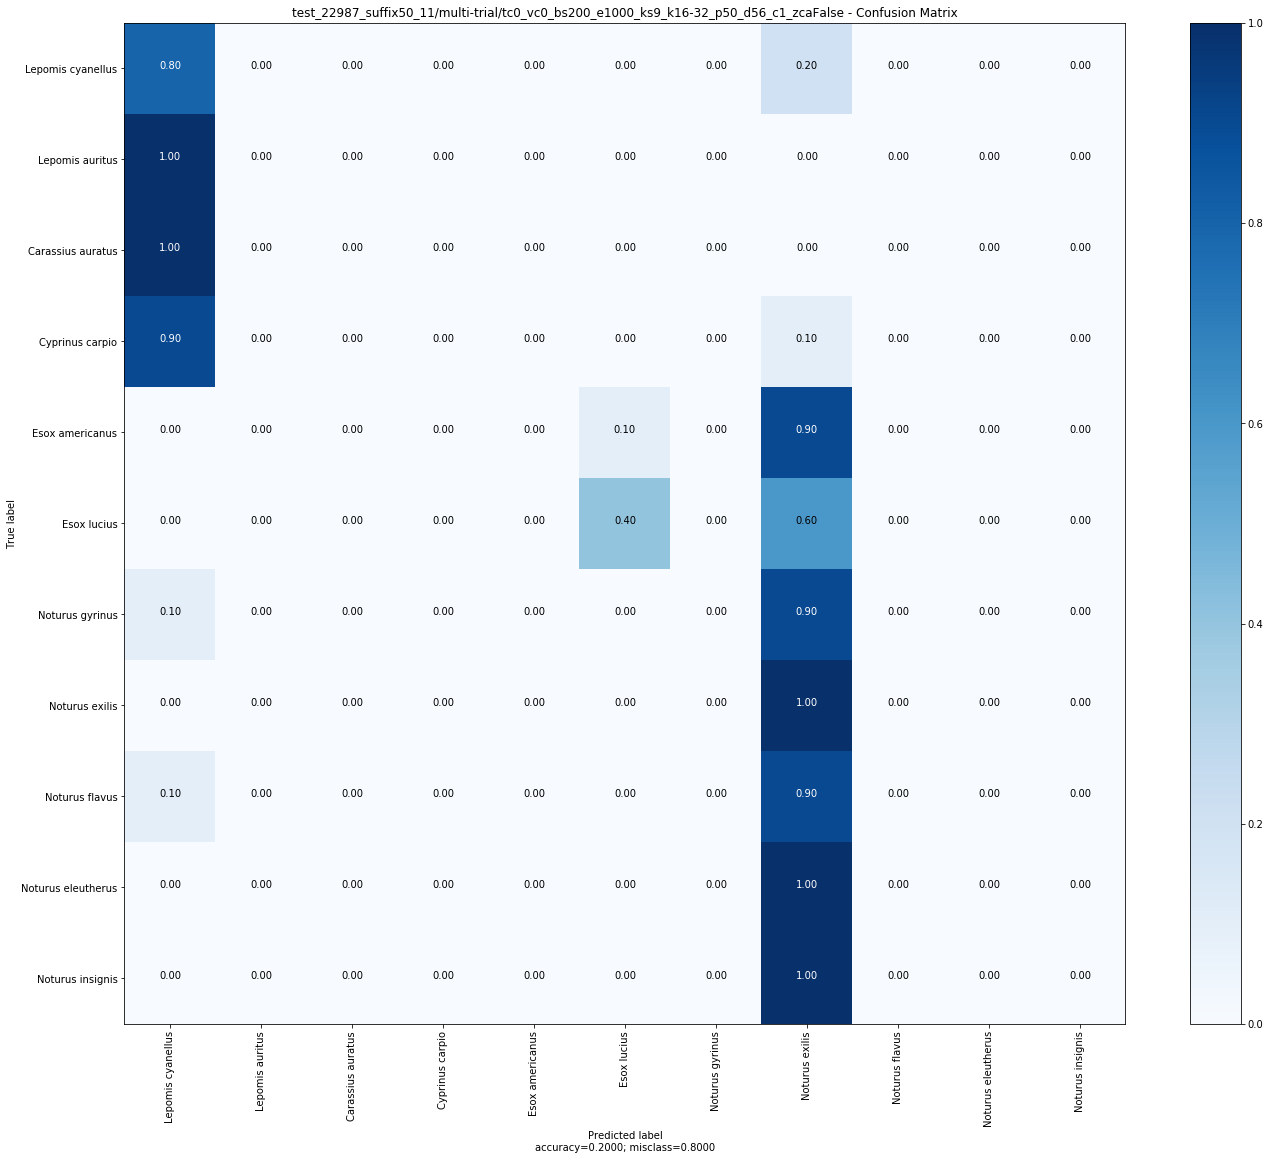

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


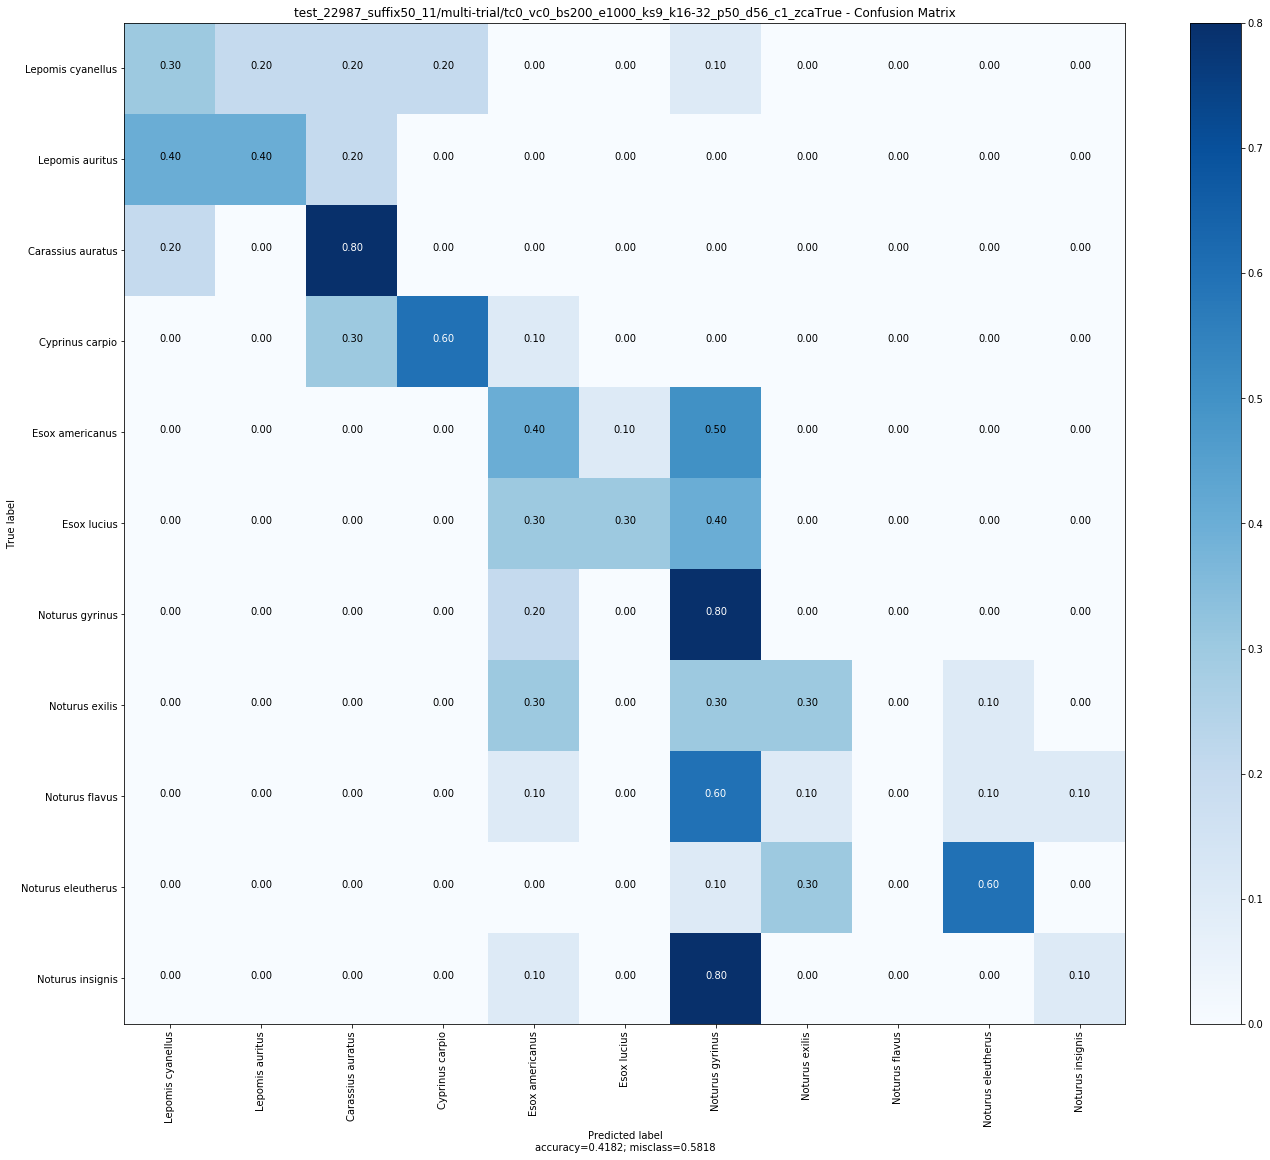

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Loading saved dataset structure...


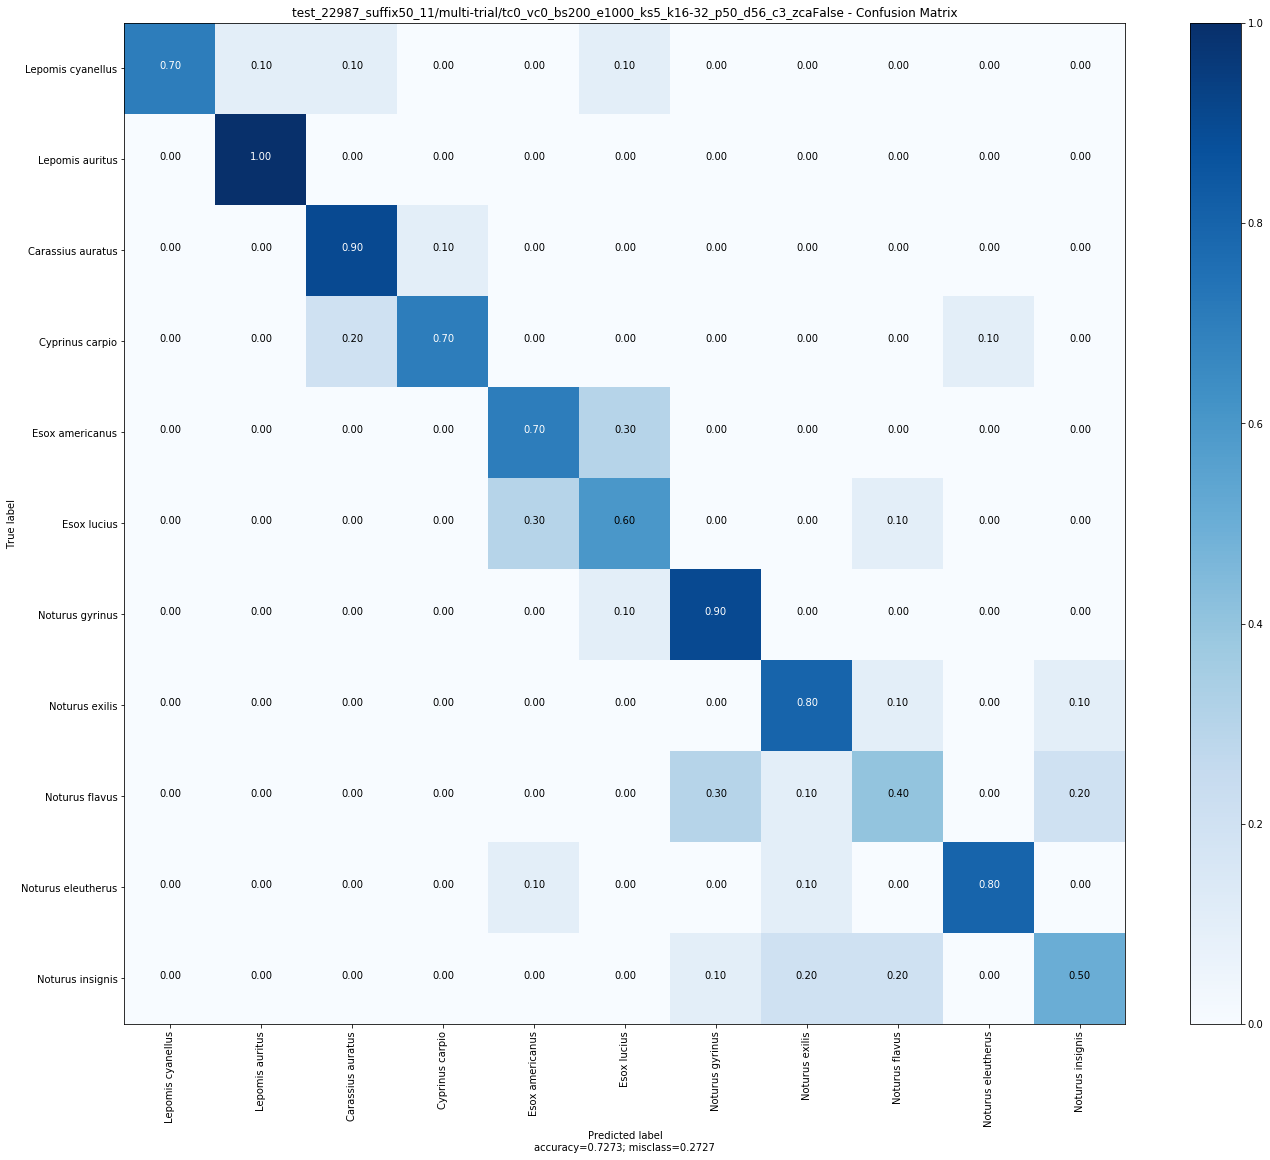

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


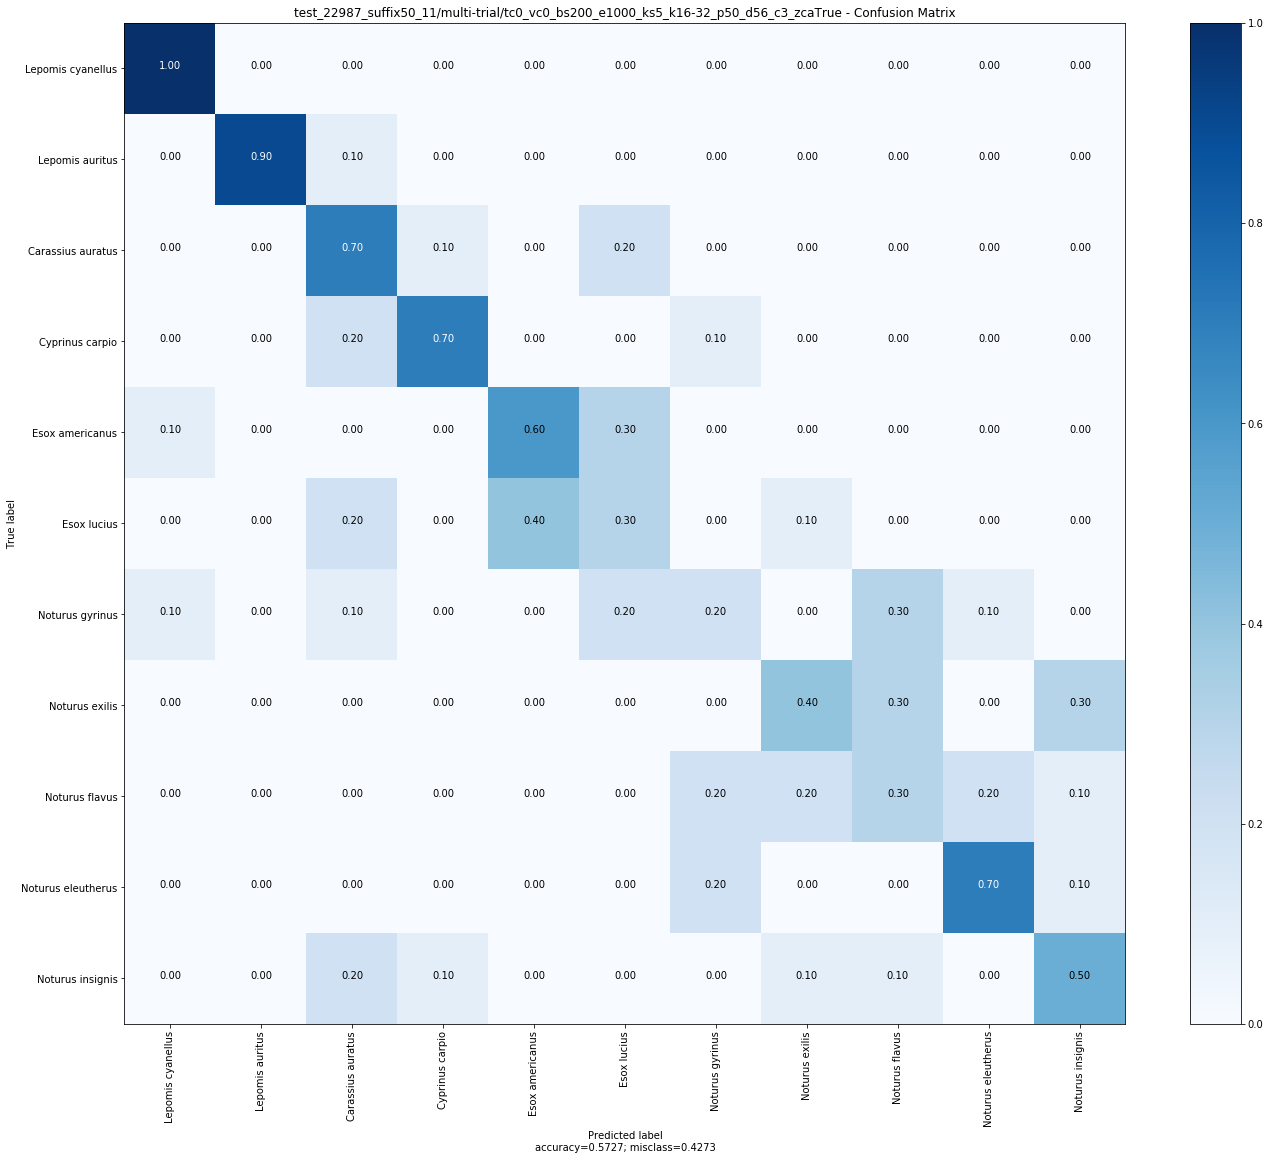

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


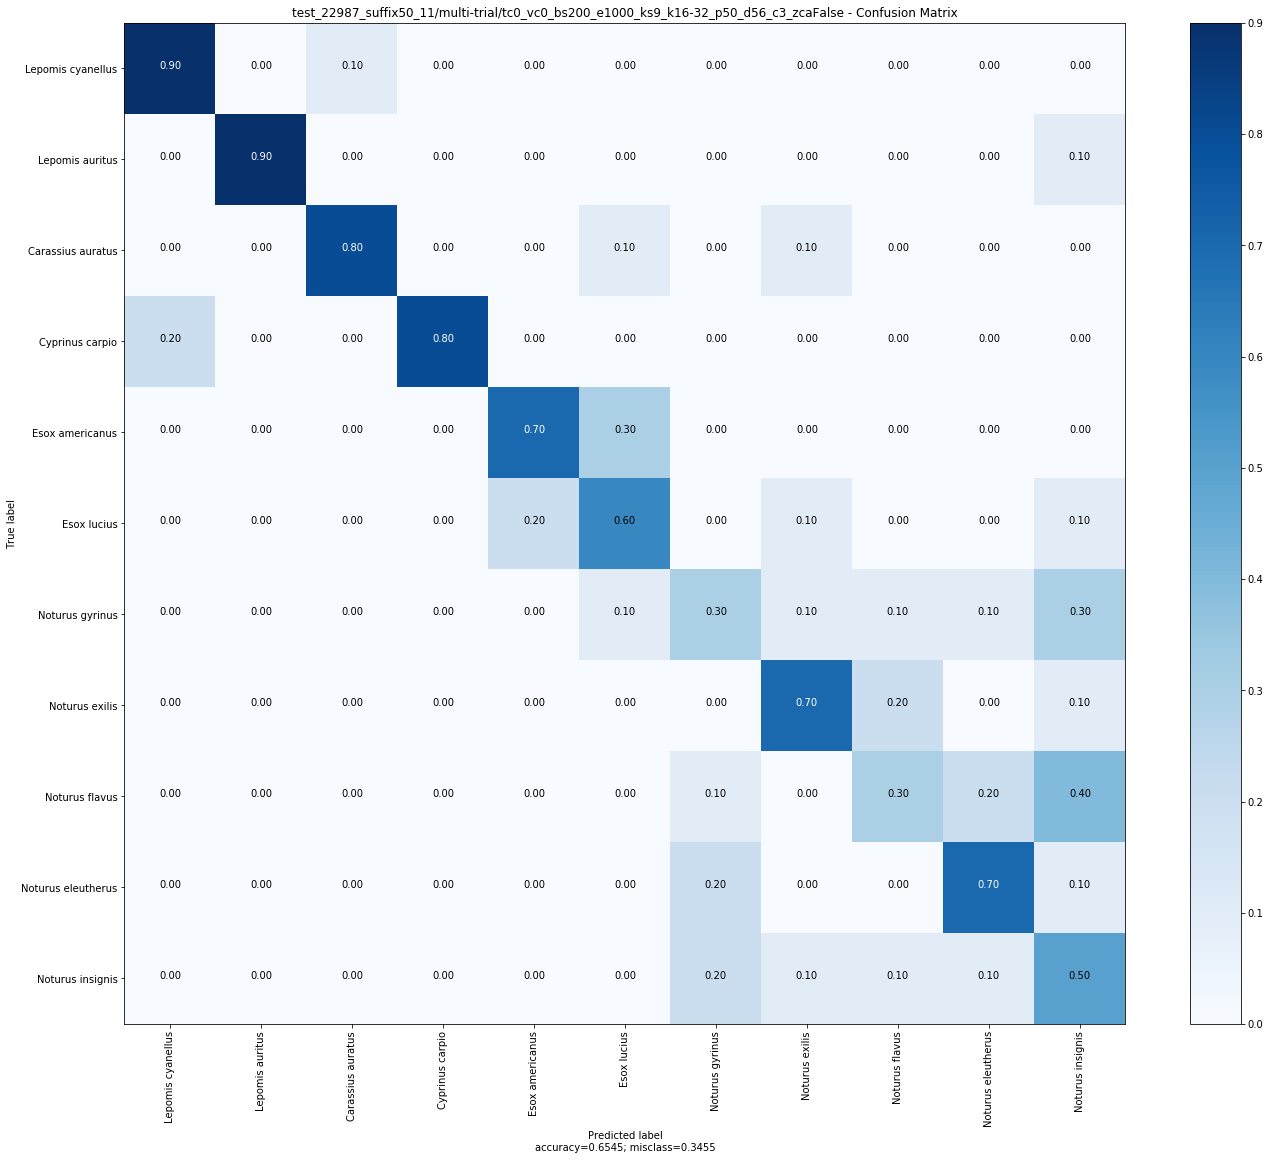

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 9, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


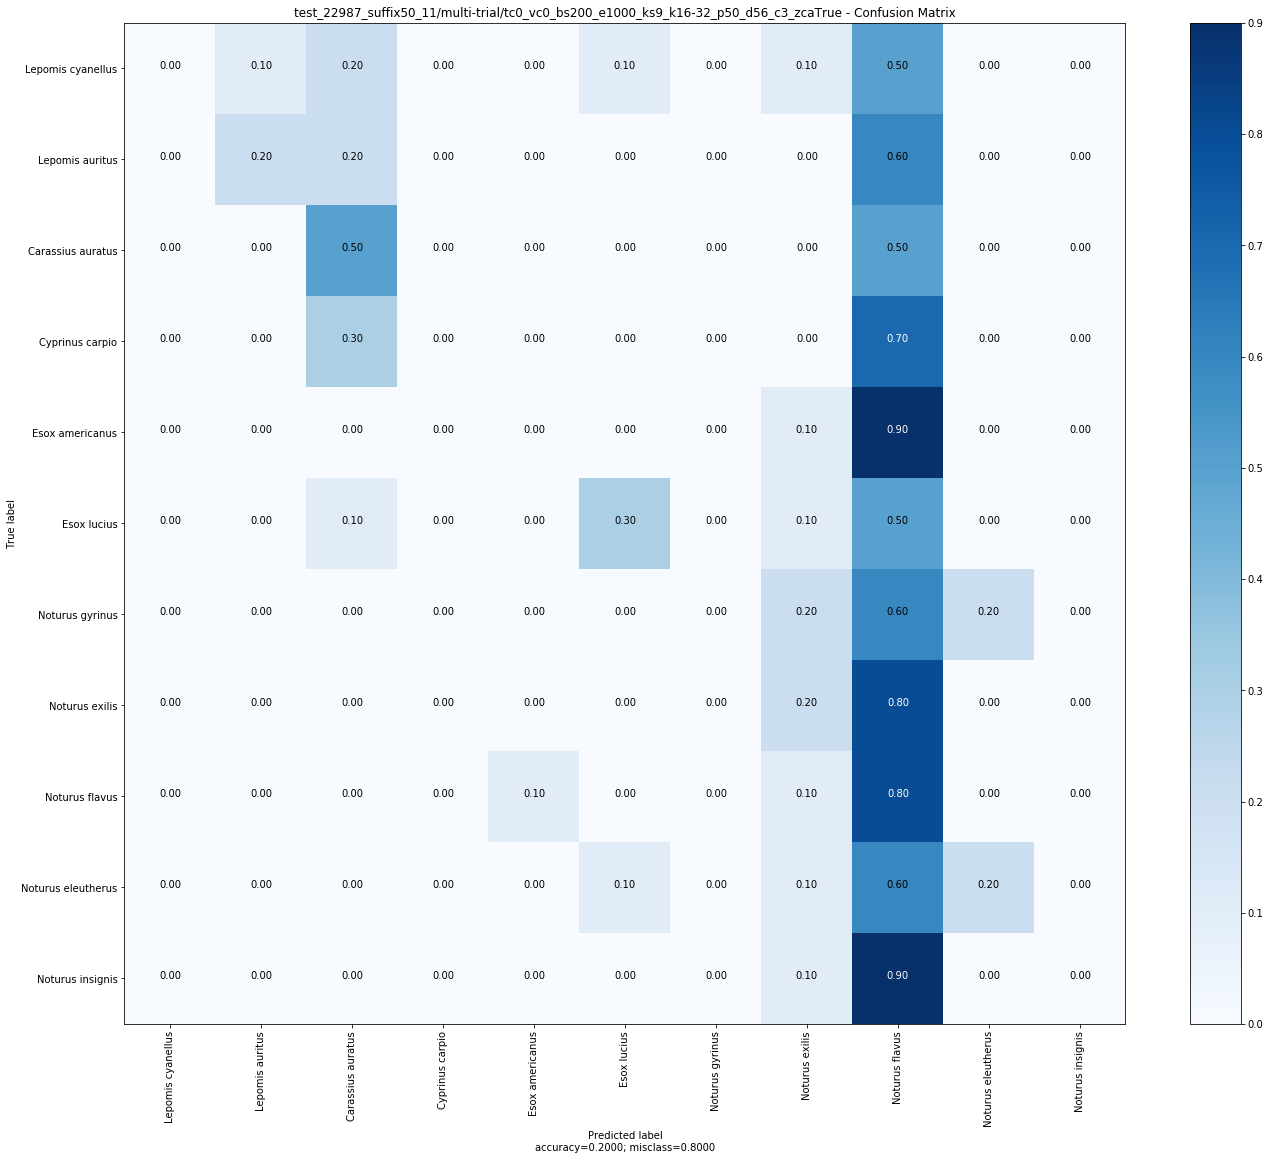

In [8]:
paramsIterator = config_parser.getHyperpIter() 
for experiment_params in paramsIterator:
    experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1
    
    print("experiment: ", experiment_params)
    
    dataset = dataLoader.FishDataset(experiment_params, showListOfSpecies)
    speciesList = dataset.getSpeciesList()
    ts.printTrialConfusionMatrix(experiment_params, speciesList, True)